# Introduction to PyTorch

### 28th October 2020 by Juan-José Giraldo (PhD candidate) and Mauricio A Álvarez

In this Notebook, we look at the torch library in Python that allows automatic differentiation. PyTorch will be used to implement different neural network models later on.

### Tensors

A tensor generalises the concept of vectors and matrices to an arbitrary number of dimensions. Another name for the same concept is multidimensional arrays. The dimensionality of a tensor is the number of indexes used to refer to scalar values within the tensor. The cell below shows an example initialising a Tensor uniformly for 1D, 2D and 3D:

In [1]:
# We first import the torch library that comes with the Anaconda distribution
import torch 
# Tensor 1D presents 1 index
y = torch.rand([2])
print('Tensor 1D presents one index','with shape', y.shape,':\n',y) #get specific size with .shape
# Tensor 2D presents 2 indexes
y = torch.rand([2,3])
print('\nTensor 2D presents two indexes','with shape',y.shape,':\n',y)
#Tensor 3D presents 3 indexes
y = torch.rand([5,2,3])
print('\nTensor 3D presents three indexes','with shape',y.shape,':\n',y)

Tensor 1D presents one index with shape torch.Size([2]) :
 tensor([0.0308, 0.9170])

Tensor 2D presents two indexes with shape torch.Size([2, 3]) :
 tensor([[0.7123, 0.0256, 0.9664],
        [0.0196, 0.6485, 0.0937]])

Tensor 3D presents three indexes with shape torch.Size([5, 2, 3]) :
 tensor([[[0.0194, 0.5528, 0.3406],
         [0.0862, 0.0538, 0.2410]],

        [[0.6245, 0.1670, 0.9026],
         [0.1127, 0.8203, 0.1505]],

        [[0.5683, 0.9590, 0.4215],
         [0.4312, 0.4663, 0.3498]],

        [[0.6428, 0.0995, 0.6408],
         [0.7309, 0.9269, 0.9899]],

        [[0.2112, 0.8130, 0.4695],
         [0.8868, 0.0729, 0.4394]]])


In [2]:
# Create a tensor with specific values
x = torch.tensor([4.0,5.0],dtype=torch.float32)
y = torch.tensor([2.0,3.0],dtype=torch.float32)

# Tensor multiplication (point-wise multiplication)
print(x*y)

tensor([ 8., 15.])


### Initialise a tensor with torch.zeros or torch.ones 

In [3]:
x_zeros = torch.zeros([3,4])
print('x_zeros:',x_zeros,'with shape',x_zeros.shape,'\n')
x_ones = torch.ones([2,6])
print('x_ones:',x_ones,'with shape',x_ones.shape)

x_zeros: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) with shape torch.Size([3, 4]) 

x_ones: tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) with shape torch.Size([2, 6])


### Reshape a tensor using .view

In [4]:
y = torch.ones([3,2])
y_reshaped = y.view(6,1)  # in contrast to the common numpy library, we use .view instead of .reshape
print(y_reshaped)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


### Numpy interoperability 

PyTorch tensors can be converted efficiently to NumPy arrays and vice versa. By doing so, you can leverage the huge swath of functionality in the wider Python ecosystem that has built up around the NumPy array type.

In [5]:
# Tensor_torch to tensor Numpy
Tensor_torch = torch.ones(3,4)
Tensor_numpy = Tensor_torch.numpy() #Returns a NumPy multidim. array of the right size, shape and numerical type.
print('Array in numpy form with shape', Tensor_numpy.shape,':\n',Tensor_numpy)

# Tensor Numpy to Tensor_torch
import numpy as np
Tensor_np = np.random.randn(5,8)    
Tensor_numpy_to_torch = torch.from_numpy(Tensor_np)
print('\nArray from Numpy to Torch with shape', Tensor_numpy_to_torch.shape,':\n',Tensor_numpy_to_torch)

Array in numpy form with shape (3, 4) :
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Array from Numpy to Torch with shape torch.Size([5, 8]) :
 tensor([[ 1.0159, -0.8714,  1.8020,  0.4635,  1.6781, -0.0297, -0.4661, -1.9653],
        [-0.6010,  0.6636,  0.7456,  0.1501,  1.2353, -0.7518,  0.0498, -0.3617],
        [ 0.2699, -2.2148, -0.3881,  1.5506, -0.3724,  0.8399, -1.6528,  0.1825],
        [ 1.3669, -0.2380, -0.7690,  1.5717,  2.6223,  0.4274, -0.2908, -1.6227],
        [-0.4966, -1.2921,  0.9741,  1.0862,  1.6831, -0.3315, -0.1201, -1.4901]],
       dtype=torch.float64)


## Automatic Differentiation

PyTorch allows to automatically obtain the gradients of a tensor with respect to a defined function. When creating the tensor, we have to indicate that it requires the gradient computation using the flag `requires_grad`  

In [6]:
x = torch.rand(3,requires_grad=True)
print(x)

tensor([0.9207, 0.2854, 0.1424], requires_grad=True)


Notice that now the Tensor shows the flag `requires_grad` as True. We can also activate such a flag in a Tensor already created as follows:

In [7]:
x = torch.tensor([1.0,2.0,3.0])
x.requires_grad_(True)
print(x)

tensor([1., 2., 3.], requires_grad=True)


Let us define a function $y=x^2+5$. The function $y$ will not only carry the result of evaluating $x$, but also the gradient function $\frac{\partial y}{\partial x}$ called `grad_fn` in the new tensor $y$

In [8]:
x = torch.tensor([2.0])
x.requires_grad_(True)  #indicate we will need the gradients with respecto to this variable
y = x**2 + 5
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To evaluate the partial derivative $\frac{\partial y}{\partial x}$, we use the `.backward()` function and the result of the gradient evaluation is stored in `x.grad` 

In [9]:
y.backward()  #dy/dx
print('PyTorch gradient:', x.grad)

#L et us compare with the analitical gradient of y = x**2+5
with torch.no_grad():    #this is to only use the tensor value without its gradient information
    dy_dx = 2*x  #analitical gradient
print('Analitical gradient:',dy_dx)

PyTorch gradient: tensor([4.])
Analitical gradient: tensor([4.])


If we evaluate a vector $\mathbf{w}=[w_1, \ldots, w_D]^{\top}$, to compute another vector $\mathbf{g}=[g_1, \ldots, g_D]^{\top}$ with elements $g_i=w_i^2+5$, then we obtain a vector $\mathbf{g}$ that contains each evaluation of the function. If we want to obtain the gradient w.r.t $\mathbf{w}$ by using "g.backward()", we have to bypass a vector of size equal to w.shape to the function, i.e., "g.backward(vect)". 

In [10]:
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)

g = w**2+5
# Below, the values [1.0,1.0,1.0] are multiplied by the gradient g.backward(vect)
# of course using the ones does not modify the value of the gradient
vect = torch.tensor([1.0,1.0,1.0],dtype=torch.float32) 
g.backward(vect)
print(w.grad)

tensor([2., 4., 6.])


On the other hand, when accessing the gradients in a for loop, PyTorch acummulates the gradients at each
iteration. In order to avoid this behaviour, we have to use the function .grad.zero_() also at each iteration. See in the example below what happens when commenting and uncommenting the line "w.grad.zero_()":

In [11]:
#Pytorch uses a cumulative process for the gradients
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)

for i in range(3):
    g = w**2+5
    g.backward(torch.ones_like(w))
    print(w.grad)
    w.grad.zero_()    #this line avoids the acummulation of the gradients uncomment it to see its effect

tensor([2., 4., 6.])
tensor([2., 4., 6.])
tensor([2., 4., 6.])


###  Question 1

Verify that the gradients provided by PyTorch coincide with the analitical gradients of the function $f = \exp \big(-x^2-2x- \sin (x) \big)$ w.r.t $x$.

In [12]:
# Provide your answer here

## Linear Regression Basic Example

We now provide a very simple example of linear regression with one input dimension, $y=wx+b$, and illustrate how we use PyTorch to optimise the parameters of the model

In [13]:
Ndata = 100 
x = torch.rand(Ndata)
true_w = 1.5
true_bias = 1.0
# We generate the dataset from the actual model but adding some noise
y = true_w*x + true_bias + 0.05*torch.randn(Ndata)
# We make sure to set the requires_grad flag to True for both paratemers
w = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
bias = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

We now define two useful functions, the prediction function and the objective function

In [14]:
def model_prediction(x,w,bias):
    return w*x + bias

def loss_function(y,y_pred):
    return ((y_pred-y)**2).mean()  #Mean Squared Error (MSE)

And we use coordinate descent to estimate the parameters of the model

\begin{align*}
    w_{k+1} = w_k - \eta \frac{dE}{dw}\\ 
    b_{k+1} = b_k - \eta \frac{dE}{db}\\ 
\end{align*}

We know that there is a closed form solution for $w$ and $b$ through the normal equation. The example is for illustrative purposes.

In [15]:
Max_Niter = 500
step_size = 0.1
for Niter in range(Max_Niter):
    # Evaluate the prediction and the loss
    y_approx = model_prediction(x,w,bias)
    my_loss = loss_function(y,y_approx)
    
    # The function .backward() has to be called in order to load the grads in w.grad
    # Notice that here it is not necessary to bypass a vector since loss_function is a scalar function
    my_loss.backward()  
        
    with torch.no_grad():        # this line avoids the gradient update while allowing to change the value of w
        w -= step_size*w.grad    # it is necessary to avoid the grad update while modifying the variable
        bias -= step_size*bias.grad
    
    # Make the zero gradient to avoid acummulation
    w.grad.zero_()
    bias.grad.zero_()
    
    # We print the loss, and the parameters values every 50 iterations
    if Niter%50==0:
        print(f'Iteration = {Niter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}')        

print(f'Iteration = {Niter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}')    
    

Iteration = 1, Loss = 3.39980412, w = 0.213, bias = 0.359
Iteration = 51, Loss = 0.01383430, w = 1.102, bias = 1.227
Iteration = 101, Loss = 0.00587356, w = 1.272, bias = 1.131
Iteration = 151, Loss = 0.00341023, w = 1.367, bias = 1.078
Iteration = 201, Loss = 0.00264800, w = 1.419, bias = 1.048
Iteration = 251, Loss = 0.00241214, w = 1.449, bias = 1.032
Iteration = 301, Loss = 0.00233915, w = 1.465, bias = 1.023
Iteration = 351, Loss = 0.00231657, w = 1.474, bias = 1.018
Iteration = 401, Loss = 0.00230958, w = 1.479, bias = 1.015
Iteration = 451, Loss = 0.00230742, w = 1.482, bias = 1.013
Iteration = 500, Loss = 0.00230676, w = 1.483, bias = 1.012


We finally plot the result

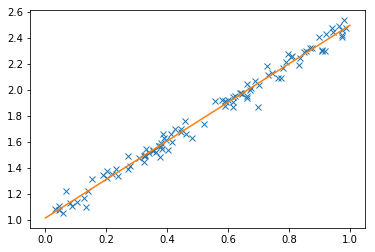

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'x')
xtest = torch.linspace(0,1,10)
with torch.no_grad():
    y_pred = model_prediction(xtest,w,bias)
plt.plot(xtest,y_pred)

### Loading a .csv dataset

We can take advantage of the interoperability between Numpy and PyTorch by loading a .csv data as a numpy array and transforming it to a Torch Tensor using `torch.from_numpy(dataset_np)`. 

In [17]:
# This cell is simply to download the winequality-red.csv dataset from its root url
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', './winequality-red.csv')

('./winequality-red.csv', <http.client.HTTPMessage at 0x7ffe3e9b7278>)

In [18]:
import numpy as np
#In the line below we avoid the first row (skiprows=1) of .csv file that contains names
#the delimeter of data for this dataset is ";"
wine_np = np.loadtxt("./winequality-red.csv",dtype=np.float32,delimiter=";",skiprows=1)
wine_torch = torch.from_numpy(wine_np)  #We take advantage of the interoperability with numpy
wine_torch

tensor([[ 7.4000,  0.7000,  0.0000,  ...,  0.5600,  9.4000,  5.0000],
        [ 7.8000,  0.8800,  0.0000,  ...,  0.6800,  9.8000,  5.0000],
        [ 7.8000,  0.7600,  0.0400,  ...,  0.6500,  9.8000,  5.0000],
        ...,
        [ 6.3000,  0.5100,  0.1300,  ...,  0.7500, 11.0000,  6.0000],
        [ 5.9000,  0.6450,  0.1200,  ...,  0.7100, 10.2000,  5.0000],
        [ 6.0000,  0.3100,  0.4700,  ...,  0.6600, 11.0000,  6.0000]])

### Revisiting linear regression for the Rented Bike Dataset of lab notebook 2

We will implement a linear regression for the Rented Bike dataset previously used in Lab. 2. We will use the same data preparation through `sklearn.preprocessing`: the OneHotEncoder() that allows to transform a categorical variable to a one-hot encoding representation, and StandardScaler() performs feature scaling by standardisation.

In [19]:
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', './SeoulBikeData.csv')

('./SeoulBikeData.csv', <http.client.HTTPMessage at 0x7ffe3fb912b0>)

The following code was borrowed from Lab Notebook 2. You can go back to that Notebook for details.

In [20]:
import pandas as pd 

bike_sharing_data = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')
bike_sharing_data = bike_sharing_data.drop('Date', axis=1)

for col in ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)']:
    bike_sharing_data[col] = bike_sharing_data[col].astype('float64')

attributes_cat = ['Seasons', 'Holiday', 'Functioning Day']
attributes_num = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', \
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# We split our dataset for Training and Testing

from sklearn.model_selection import train_test_split
bs_train_set, bs_test_set = train_test_split(bike_sharing_data, test_size=0.15, random_state=42)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

full_transform = ColumnTransformer([
    ("num", StandardScaler(), attributes_num),
    ("cat", OneHotEncoder(), attributes_cat),
])

# We separate the features from the labels

bs_train_set_attributes = bs_train_set.drop('Rented Bike Count', axis=1)
bs_test_set_attributes = bs_test_set.drop('Rented Bike Count', axis=1)
bs_train_set_labels = bs_train_set['Rented Bike Count']
bs_test_set_labels = bs_test_set['Rented Bike Count']

We now use the function `torch.from_numpy()` to transform the data previously prepared, into a Torch Tensor. We make sure to add a column of ones to the attributes (remember that $x_0=1$) both in the train and test sets.

In [21]:
# We apply the preprocessing transformation over the features of the training data

bs_train_set_attributes_prepared = full_transform.fit_transform(bs_train_set_attributes)
bs_test_set_attributes_prepared = full_transform.transform(bs_test_set_attributes)

Train_torch = torch.from_numpy(bs_train_set_attributes_prepared)

# The line below adds a feature vector of ones in order to allow the bias weight
# to be represented in a unique weight vector.

Train_torch = torch.cat((torch.ones([Train_torch.shape[0],1],dtype=torch.float64),Train_torch), 1)  
Test_torch = torch.from_numpy(bs_test_set_attributes_prepared)

# The line below adds a feature vector of ones in order to allow the bias weight
# to be represented in a unique weight vector.

Test_torch = torch.cat((torch.ones([Test_torch.shape[0],1],dtype=torch.float64),Test_torch), 1)
Train_Label_torch = torch.from_numpy(bs_train_set_labels.values)

Test_Label_torch = torch.from_numpy(bs_test_set_labels.values)

We create a vector of weights $\mathbf{w}$ with the corresponding flag for the gradient and two functions, one for prediction and one for the loss function.

In [22]:
# We create the vector of weights to be optimised in the linear regression model
dim = Train_torch.shape[1]
w = torch.randn([dim,1],dtype=torch.float64)  # vector of weight w is a vector Dim x 1
w.requires_grad_(True)

# We create the model prediction which consists on an inner product X'w, where X is a design matrix of N x Dim
def model_prediction_lr(x,w):
    return torch.matmul(x,w)

def loss_function_lr(y,y_pred):
    return ((y_pred-y)**2).mean()  # Mean Squared Error (MSE)

We finally use gradient descent to find the optimal value for $\mathbf{w}$
$$
\mathbf{w}_{k+1} = \mathbf{w}_k - \eta \frac{dE(\mathbf{w})}{d\mathbf{w}}
$$


In [23]:
# Training the model with Gradient Descent

Max_Niter = 50 # If you have many iterations, this process can take some time
step_size = 0.001
for Niter in range(Max_Niter):
    y_approx = model_prediction_lr(Train_torch,w)
    my_loss = loss_function_lr(Train_Label_torch,y_approx)
    
    # The function .backward() has to be called in order to load the grads in w.grad
    # Notice that here it is not necessary to bypass a vector since loss_function is a scalar function
    
    my_loss.backward()  
        
    with torch.no_grad():    # this line avoids the gradient update while allowing to change the value of w
        w -= step_size*w.grad    # it is necessary to avoid the grad update while modifying the variable
        
    # print(w.grad)
    # Make the zero gradient to avoid acummulation
    w.grad.zero_()
    
    if Niter%20==0 or Niter == Max_Niter-1:
        print(f'Iteration = {Niter+1}, Loss = {my_loss:.8f}')
        #print('Weights vector:\n', w)

Iteration = 1, Loss = 915136.17681741
Iteration = 21, Loss = 805693.80897282
Iteration = 41, Loss = 720443.50625595
Iteration = 50, Loss = 688501.84858444


We finally provide the RMSE for the test set

In [24]:
# RMSE over the test set

y_pred_test = model_prediction_lr(Test_torch,w)
MSE_test = loss_function_lr(Test_Label_torch,y_pred_test)
print('The Root Mean Squared Error over the test set is:', np.sqrt(MSE_test.detach().numpy()))

The Root Mean Squared Error over the test set is: 820.2252939040247


### Question 2

Implement the prediction using an exponential transformation for model_prediction_lr, i.e., $y_{\text{approx}} = \exp(\mathbf{w}^{\top}\mathbf{x})$. Since the labels are positive values, this transformation guarrantees that the predictions are always positive. Hint: Be careful initialising w and updating it with big step_sizes.

In [25]:
# Provide your answer here